# MONTHLY MILK PRODUCTION DATA

# FORCASTING TIME SERIES DATA 

# MONTHLY MILK PRODUCTION

####steps required;

1. Intraduction
2. Data preprocessing according to Time series
3. Model fitting
4. Obtaining the forcasts
5. Plotting the forcasts
6. Cross validation
7. Computing Perfomance matrics
8. Visualize the Performance Mertics
9. Conclusions


In [18]:
# step 1

import pandas as pd
import fbprophet
import matplotlib.pyplot as plt

In [19]:
df=pd.read_csv('monthly-milk-production-pounds.csv')

In [20]:
df.head()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [21]:
df.tail()

,Month,Monthly milk production: pounds per cow. Jan 62 ? Dec 75
165,1975-10,827.0
166,1975-11,797.0
167,1975-12,843.0
168,NaN,NaN
169,Monthly milk production: pounds per cow. Jan 6...,NaN


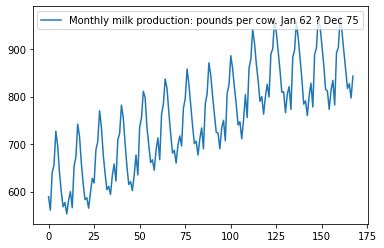

In [22]:
# step 2


In [23]:
df.isnull().sum()

Month                                                       1
Monthly milk production: pounds per cow. Jan 62 ? Dec 75    2
dtype: int64

In [24]:
df.columns=['ds','y']

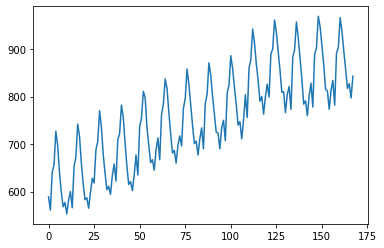

In [25]:
df['y'].plot()

In [28]:
df=df.dropna()

In [29]:
df.head()

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [30]:
df.isnull().sum()

ds    0
y     0
dtype: int64

In [11]:
df['ds']=pd.to_datetime(df['ds'])

<ipython-input-11-9ea62d8e935b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds']=pd.to_datetime(df['ds'])


In [31]:
df.head(5)

,ds,y
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [14]:
# sfifting it to make stationary
#df['y']=df['y']-df['y'].shift(1)

In [15]:
df.head()

,ds,y
0,1962-01-01,589.0
1,1962-02-01,561.0
2,1962-03-01,640.0
3,1962-04-01,656.0
4,1962-05-01,727.0


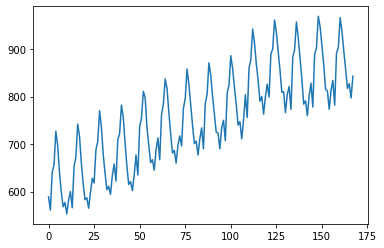

In [32]:
df['y'].plot()

In [33]:
from fbprophet import Prophet

In [34]:
# to know in_built features
dir(Prophet)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_load_stan_backend',
 'add_country_holidays',
 'add_group_component',
 'add_regressor',
 'add_seasonality',
 'construct_holiday_dataframe',
 'fit',
 'flat_growth_init',
 'flat_trend',
 'fourier_series',
 'initialize_scales',
 'linear_growth_init',
 'logistic_growth_init',
 'make_all_seasonality_features',
 'make_future_dataframe',
 'make_holiday_features',
 'make_seasonality_features',
 'parse_seasonality_args',
 'percentile',
 'piecewise_linear',
 'piecewise_logistic',
 'plot',
 'plot_components',
 'predict',
 'predict_seasonal_components',
 'predict_trend',
 'predict_uncertainty',
 'predictive_samples',
 'regressor_col

In [35]:
# inetialize the model
model=Prophet()

In [20]:
model.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [21]:
model

In [22]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [23]:
future_dates=model.make_future_dataframe(periods=365)

In [24]:
future_dates

,ds
0,1962-01-01
1,1962-02-01
2,1962-03-01
3,1962-04-01
4,1962-05-01
...,...
528,1976-11-26
529,1976-11-27
530,1976-11-28
531,1976-11-29


In [25]:
prediction=model.predict(future_dates)

In [26]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1962-01-01,606.849794,576.333625,595.725066,606.849794,606.849794,-20.104687,-20.104687,-20.104687,-20.104687,-20.104687,-20.104687,0.0,0.0,0.0,586.745106
1,1962-02-01,608.569237,536.373340,556.096752,608.569237,608.569237,-62.543222,-62.543222,-62.543222,-62.543222,-62.543222,-62.543222,0.0,0.0,0.0,546.026015
2,1962-03-01,610.122282,631.207791,651.126013,610.122282,610.122282,31.413370,31.413370,31.413370,31.413370,31.413370,31.413370,0.0,0.0,0.0,641.535653
3,1962-04-01,611.841725,649.250618,668.434337,611.841725,611.841725,46.743537,46.743537,46.743537,46.743537,46.743537,46.743537,0.0,0.0,0.0,658.585263
4,1962-05-01,613.505703,711.750713,731.147997,613.505703,613.505703,108.056343,108.056343,108.056343,108.056343,108.056343,108.056343,0.0,0.0,0.0,721.562045


In [27]:
prediction[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
528,1976-11-26,815.170733,803.962265,825.827161
529,1976-11-27,818.390320,807.214981,829.827412
530,1976-11-28,821.779740,811.445211,833.054230
531,1976-11-29,825.275899,814.844505,836.325143
532,1976-11-30,828.808844,818.254941,839.736492


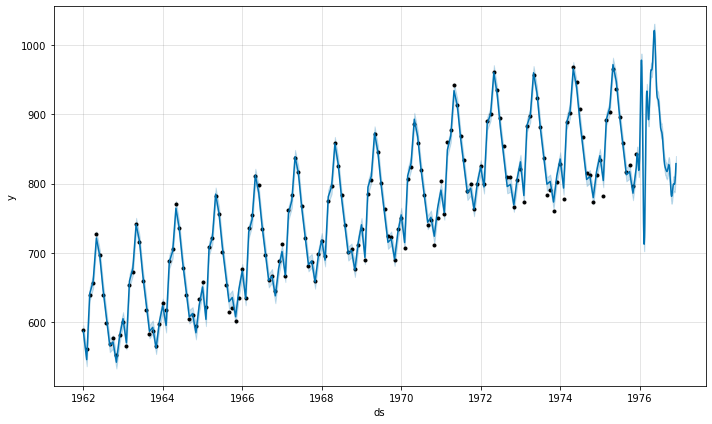

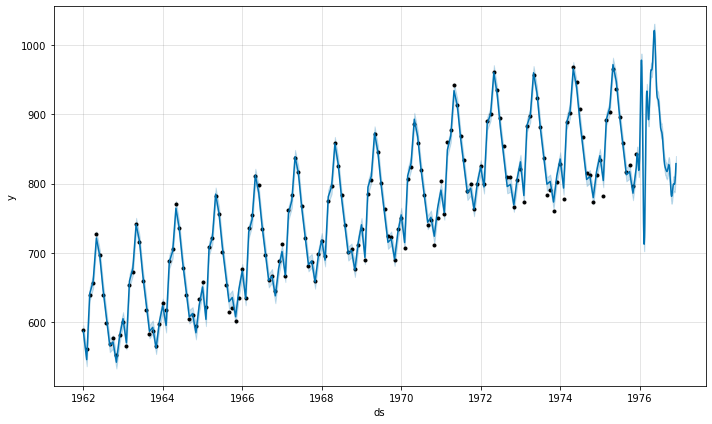

In [28]:
#plot predicted forcating
model.plot(prediction)

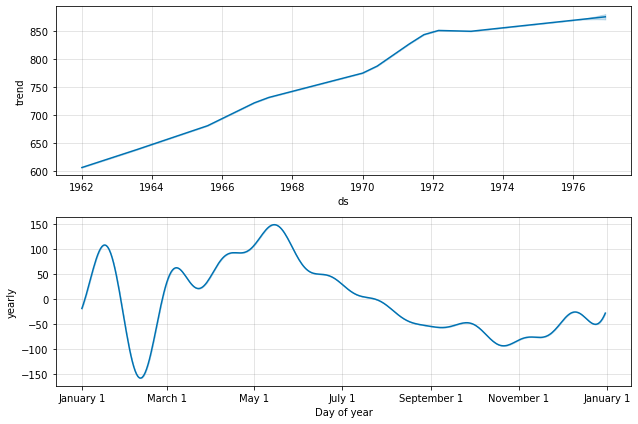

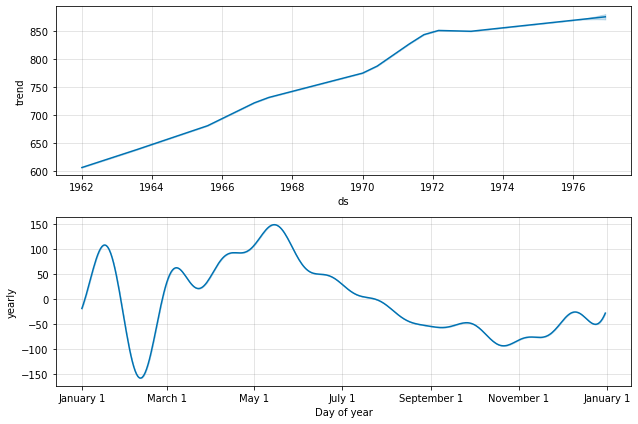

In [29]:
### visualize each componets [trends,weekly]
model.plot_components(prediction)

In [30]:
#cross validation
from fbprophet.diagnostics import cross_validation

In [31]:
df_cv=cross_validation(model,horizon='365 days',period='180 days',initial='1095 days')

INFO:fbprophet:Making 21 forecasts with cutoffs between 1965-01-22 00:00:00 and 1974-12-01 00:00:00


In [32]:
df_cv.head(20)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1965-02-01,619.087141,617.217664,620.641464,622.0,1965-01-22
1,1965-03-01,697.071986,689.950821,702.536036,709.0,1965-01-22
2,1965-04-01,709.290761,694.723857,721.216186,722.0,1965-01-22
3,1965-05-01,774.436723,752.122928,794.219497,782.0,1965-01-22
4,1965-06-01,742.879282,710.453945,772.279768,756.0,1965-01-22
5,1965-07-01,685.841095,645.100376,724.024293,702.0,1965-01-22
6,1965-08-01,645.738193,594.407005,694.805756,653.0,1965-01-22
7,1965-09-01,612.574423,550.706046,674.401341,615.0,1965-01-22
8,1965-10-01,620.068429,547.705848,692.599961,621.0,1965-01-22
9,1965-11-01,601.133864,514.753247,688.396808,602.0,1965-01-22


In [33]:
len(df_cv)

252

In [34]:
from fbprophet.diagnostics import performance_metrics

In [35]:
df_performance=performance_metrics(df_cv)

In [36]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,38 days,257.644337,16.051303,12.572310,0.016147,0.014236,0.28
1,41 days,255.691801,15.990366,12.493472,0.016083,0.014236,0.28
2,42 days,271.279611,16.470568,12.972159,0.016746,0.014528,0.28
3,43 days,273.143144,16.527043,13.204699,0.017115,0.014528,0.28
4,46 days,259.725549,16.116003,12.958665,0.016791,0.014528,0.28
...,...,...,...,...,...,...,...
180,357 days,881.141224,29.684023,22.511721,0.028321,0.021820,0.36
181,360 days,687.891427,26.227684,19.452020,0.024156,0.017203,0.40
182,361 days,675.174515,25.984120,19.054909,0.023753,0.014183,0.40
183,362 days,658.322393,25.657794,18.347110,0.022942,0.013880,0.44


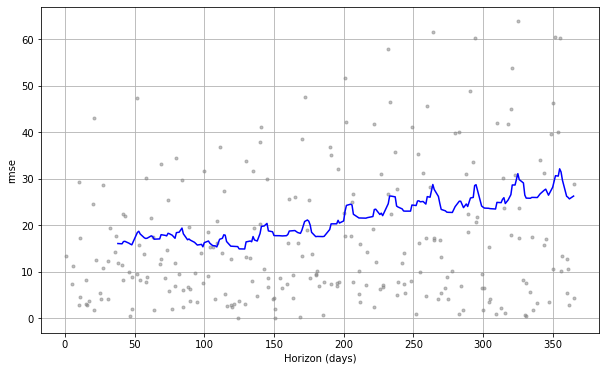

In [37]:
from fbprophet.plot import plot_cross_validation_metric
fig=plot_cross_validation_metric(df_cv,metric='rmse')